# CRISPR Repair Prediction: Deletion Length Analysis

This notebook documents the analysis and results of a neural network model trained to predict the length of deletions in CRISPR repair outcomes. CNN-based architecture used and evaluated performance across multiple random seeds.

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
from data_loader import get_data_loaders

#Load the data
train_loader, valid_loader, test_loader = get_data_loaders(batch_size=32)

#Display first few rows of the training set
for batch in train_loader:
    sequences, labels = batch
    print("Sample sequences:\n", sequences[:5])
    print("Corresponding labels:\n", labels[:5])
    break

ModuleNotFoundError: No module named 'pandas'

## Data Overview
The training data consists of sequences and corresponding deletion lengths. Below, are  the first few examples from the dataset:

  GuideSeq_ID                 GuideSeq          Y
0  GuideSeq 1  CTGCAGGGCTAGTTTCCTATAGG   4.301844
1  GuideSeq 2  GAGATGCGGACCACCCAGCTGGG  10.814444
2  GuideSeq 3  GCAAACGGAAGTGCAATTGTCGG   9.888889
3  GuideSeq 4  GTCATCGCTGAGTTGAGGAAGGG   4.527812
4  GuideSeq 5  ATATGATTATCCCTGCACAAGGG   6.415644

In [3]:
from model import CRISPRCNN
from train import train_model
import torch

#Hyperparameters
num_epochs = 10
learning_rate = 0.001
model = CRISPRCNN(sequence_length=23)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Training
train_model(model, train_loader, criterion, optimizer, num_epochs)

ModuleNotFoundError: No module named 'model'

## Model Training
Model trained using the following hyperparameters:
- **Learning rate**: 0.001
- **Epochs**: 10
The training loss is printed at the end of each epoch to track progress.

In [4]:
from evaluate import evaluate_model

#Evaluate model
mse, mae, r2 = evaluate_model(model, valid_loader)
print(f"Validation Results - MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

ModuleNotFoundError: No module named 'evaluate'

## Evaluation Metrics
After training, we evaluate the model on the validation set using the following metrics:
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**

These metrics help assess the model's accuracy in predicting deletion lengths.

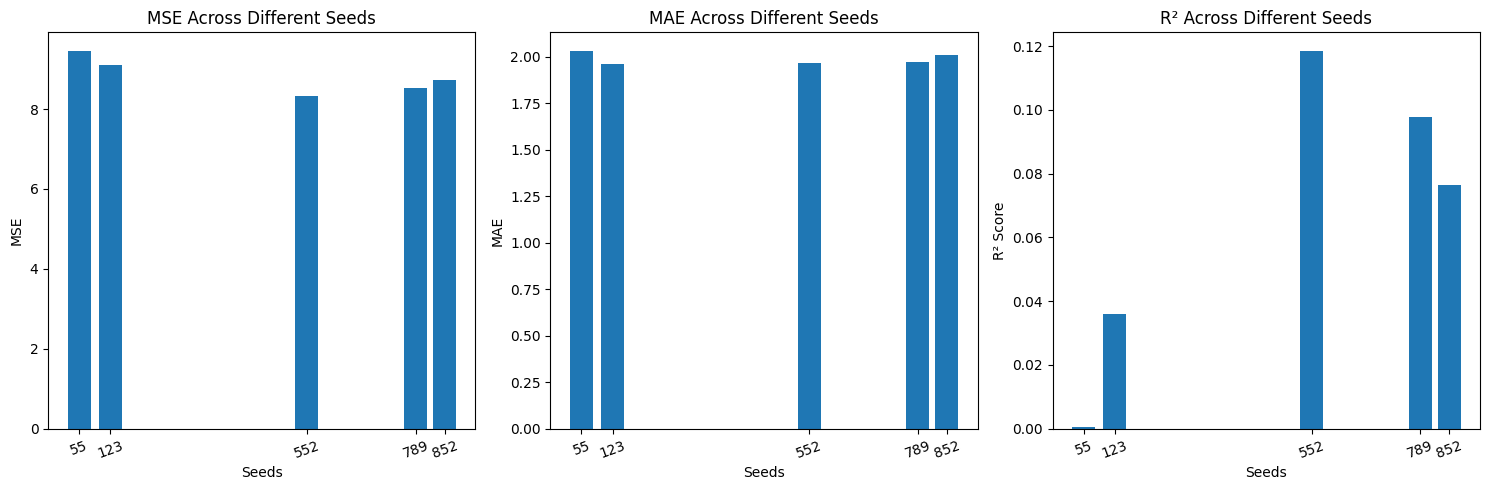

In [1]:
import matplotlib.pyplot as plt

#Data from the terminal output
seeds = [55, 123, 552, 789, 852]
mse_list = [9.4503, 9.1145, 8.3354, 8.5325, 8.7325]
mae_list = [2.0293, 1.9628, 1.9640, 1.9736, 2.0083]
r2_list = [0.0005, 0.0360, 0.1184, 0.0976, 0.0764]

#Creating visualizations
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#MSE plot
ax[0].bar(seeds, mse_list, width=50)  
ax[0].set_title('MSE Across Different Seeds')
ax[0].set_xlabel('Seeds')
ax[0].set_ylabel('MSE')
ax[0].set_xticks(seeds)
ax[0].tick_params(axis='x', rotation=20)

#MAE plot
ax[1].bar(seeds, mae_list, width=50)  
ax[1].set_title('MAE Across Different Seeds')
ax[1].set_xlabel('Seeds')
ax[1].set_ylabel('MAE')
ax[1].set_xticks(seeds)
ax[1].tick_params(axis='x', rotation=20)

#R² plot
ax[2].bar(seeds, r2_list, width=50)  
ax[2].set_title('R² Across Different Seeds')
ax[2].set_xlabel('Seeds')
ax[2].set_ylabel('R² Score')
ax[2].set_xticks(seeds)
ax[2].tick_params(axis='x', rotation=20)


plt.tight_layout()
plt.show()

In [2]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.6/163.6 kB 3.6 MB/s eta 0:00:004.0 MB/s eta 0:00:01
  Using cached kiwisolver-1.4.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 15.4 MB/s eta 0:00:0031m15.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.1 MB/s eta 0:00:00m eta

## Performance Across Seeds
Model's performance across different random seeds to assess variability and robustness. Error bars can be added to reflect standard deviations of the results.

## Conclusion
This analysis explores the predictability of CRISPR deletions using a CNN model. In conclusion, the model’s performance varied across different seeds, with seed 552 yielding the best results, achieving the lowest MSE of 8.3354, the lowest MAE of 1.9640, and the highest R² of 0.1184. This indicates that the model’s predictive accuracy was more reliable with this initialization. However, the overall low R² values across all seeds suggest that the model struggles to fully capture the variability in the data. This points to potential areas for improvement, such as enhancing feature selection, model complexity, or fine-tuning hyperparameters to achieve better performance.